<a href="https://colab.research.google.com/github/emilebosman39154/emilebosman39154/blob/main/P4E_Lesson24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lesson 24 : Chapter 12 (Networked Programmes)**



# **Quick Test**

# **Quick Test Answers**

# **1. Socket Programming**




Socket programming is a way of **connecting two nodes on a network to communicate with each other**. **One** socket(node) **listens** on a **particular port** at an IP, while the **other** socket **reaches out** to the other to **form a connection**. The server forms the listener socket while the client reaches out to the server. 

They are the real backbones behind web browsing. In simpler terms, there is a server and a client. 

## **HOW?**

1. Socket programming is **started by importing the socket library** and **making a simple socket** (connection). 

In [ ]:
import socket
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

**Explain:** Here we made a socket instance and passed it **two parameters**. The **first parameter** is AF_INET and the **second one** is SOCK_STREAM. AF_INET refers to the address-family ipv4. The SOCK_STREAM means connection-oriented TCP protocol. 

Now we can connect to a server using this socket.

**Further explanation:** 

**Transmission Control Protocol (TCP)** = a communications standard that enables application programs and computing devices to exchange messages over a network. It is designed to send packets across the internet and ensure the successful delivery of data and messages over networks.

“**IPv4** = the fourth version of the internet protocol. IP, which stands for internet protocol, is the internet’s principal set of rules for communications.  **The internet protocol suite governs rules for packetizing, addressing, transmitting, routing, and receiving data over networks.** IPv4, is also at a crossroads: its global IP address supply is exhausted.  A transision to version 6 is in process.

**2.** In case of an **error in the connection**:

Note that if any error occurs during the creation of a socket then a socket. error is thrown and we can only connect to a server by knowing its IP. You can find the IP of the server by using this : 

In [ ]:
# from cmd or terminal in command line

# ping www.google.com 

**Output will be:**

emilebosman@Emile-Mini ~ % ping www.google.com 

PING www.google.com (216.239.38.120): 56 data bytes

64 bytes from 216.239.38.120: icmp_seq=0 ttl=117 time=110.345 ms

64 bytes from 216.239.38.120: icmp_seq=1 ttl=117 time=7.591 ms

64 bytes from 216.239.38.120: icmp_seq=2 ttl=117 time=7.263 ms

**Finding the IP Address using Python:**

In [ ]:
import socket 

ip = socket.gethostbyname('www.google.com')
print(ip)

74.125.197.99


In [ ]:
# An example script to connect to Google using socket
# programming in Python
import socket # for socket
import sys
 
try:
    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    print ("Socket successfully created")
except socket.error as err:
    print ("socket creation failed with error %s" %(err))
 
# default port for socket
port = 80
 
try:
    host_ip = socket.gethostbyname('www.google.com')
except socket.gaierror:
 
    # this means could not resolve the host
    print ("there was an error resolving the host")
    sys.exit()
 
# connecting to the server
s.connect((host_ip, port))
 
print ("the socket has successfully connected to google")

**First** of all, we made a socket.

**Then** we resolved google’s IP and lastly, we connected to google.

Now we need to know how can we send some data through a socket.

For sending data the socket library has a sendall function. This function allows you to send data to a server to which the socket is connected and the server can also send data to the client using this function.

# **2. Retrieving Text file**


In [ ]:
import socket

mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect(('data.pr4e.org', 80))
cmd = 'GET http://data.pr4e.org/romeo.txt HTTP/1.0\r\n\r\n'.encode()
mysock.send(cmd)

while True:
    data = mysock.recv(512)
    if len(data) < 1:
        break
    print(data.decode(),end='')

mysock.close()

# **2. Retrieving Image file**


In [ ]:
import socket
import time

HOST = 'data.pr4e.org'
PORT = 80
mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect((HOST, PORT))
mysock.sendall(b'GET http://data.pr4e.org/cover3.jpg HTTP/1.0\r\n\r\n')
count = 0
picture = b""

while True:
    data = mysock.recv(5120)
    if len(data) < 1: break
    #time.sleep(0.25)
    count = count + len(data)
    print(len(data), count)
    picture = picture + data

mysock.close()

# Look for the end of the header (2 CRLF)
pos = picture.find(b"\r\n\r\n")
print('Header length', pos)
print(picture[:pos].decode())

# Skip past the header and save the picture data
picture = picture[pos+4:]
fhand = open("stuff.jpg", "wb")
fhand.write(picture)
fhand.close()

# **2. Retrieving URL page / file**


In [ ]:
import urllib.request

fhand = urllib.request.urlopen('http://data.pr4e.org/romeo.txt')
for line in fhand:
    print(line.decode().strip())

**We can know use the text we retrieved through normal Python programming:**

Creating a frequesncy table (dictionary)

In [ ]:
import urllib.request, urllib.parse, urllib.error

fhand = urllib.request.urlopen('http://data.pr4e.org/romeo.txt')

counts = dict()
for line in fhand:
    words = line.decode().split()
    for word in words:
        counts[word] = counts.get(word, 0) + 1
print(counts)

**If Graphic / Video is too large:**

Creating a buffer becomes important:

In [ ]:
import urllib.request, urllib.parse, urllib.error

img = urllib.request.urlopen('http://data.pr4e.org/cover3.jpg')
fhand = open('cover3.jpg', 'wb')
size = 0
while True:
    info = img.read(100000)
    if len(info) < 1: break
    size = size + len(info)
    fhand.write(info)

print(size, 'characters copied.')
fhand.close()

230210 characters copied.


## **5. Web Scraping**

Run the following in VS Code:

In [ ]:
<h1>The First Page</h1>
<p>
If you like, you can switch to the
<a href="http://www.dr-chuck.com/page2.htm">
Second Page</a>.
</p>

Using a RegEx to extract the link values in the web pages above:

In [ ]:
href="http[s]?://.+?"

Our regular expression looks for strings that start with “href="http://” or
“href="https://”, followed by one or more characters (.+?), followed by another
double quote. The question mark behind the [s]? indicates to search for the
string “http” followed by zero or one “s”.

The question mark added to the .+? indicates that the match is to be done in
a “non-greedy” fashion instead of a “greedy” fashion. A non-greedy match tries
to find the smallest possible matching string and a greedy match tries to find the largest possible matching string.

We add parentheses to our regular expression to indicate which part of our matched string we would like to extract, and produce the following program:

In [ ]:
# Search for link values within URL input
import urllib.request, urllib.parse, urllib.error
import re
import ssl

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

url = input('Enter - ')
html = urllib.request.urlopen(url, context=ctx).read()
links = re.findall(b'href="(http[s]?://.*?)"', html)
for link in links:
    print(link.decode())

# enter: https://docs.python.org/

## **5.1 Beautiful Soap**

One of the best ways of parsing HTML input and extract links are with the BeautifulSoup library. BeautifulSoup tolerates highly flawed HTML and still
lets you easily extract the data you need. 

**Install Beautifull Soap Library:**

Copy the pip command line from the link below and run from cmd (Windows) or terminal (Mac).

https://pypi.python.org/pypi/beautifulsoup4

Installing a parser if BeautifulSoup does not extract the information accurately with the build-in parser in python:

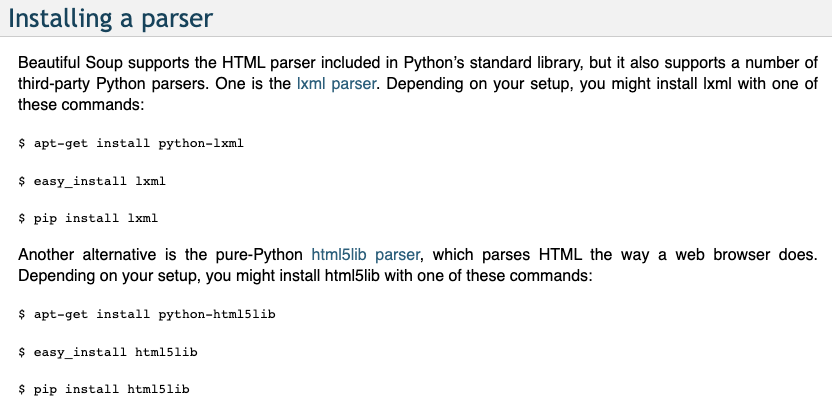

In [ ]:
# To run this, download the BeautifulSoup zip file
# http://www.py4e.com/code3/bs4.zip
# and unzip it in the same directory as this file

import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

url = input('Enter - ')
html = urllib.request.urlopen(url, context=ctx).read()
soup = BeautifulSoup(html, 'html.parser')

# Retrieve all of the anchor tags
tags = soup('a')
for tag in tags:
    print(tag.get('href', None))

# enter: https://docs.python.org/

# The program prompts for a web address, then opens the web page, reads the data
# and passes the data to the BeautifulSoup parser, and then retrieves all of the
# anchor tags and prints out the href attribute for each tag.

Amend the Python code to **only extract certain tag's text:**

In [ ]:
# To run this, download the BeautifulSoup zip file
# http://www.py4e.com/code3/bs4.zip
# and unzip it in the same directory as this file

from urllib.request import urlopen
from bs4 import BeautifulSoup
import ssl

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

url = input('Enter - ')
html = urlopen(url, context=ctx).read()
soup = BeautifulSoup(html, "html.parser")

# Retrieve all of the anchor tags
tags = soup('a')
for tag in tags:
    # Look at the parts of a tag
    print('TAG:', tag)
    print('URL:', tag.get('href', None))
    print('Contents:', tag.contents[0])
    print('Attrs:', tag.attrs)

# enter: https://docs.python.org/

**Extracting Text from a Website:**

In [ ]:
from bs4 import BeautifulSoup
import requests

# Getting the HTML from a website
website = "http://www.script-o-rama.com/movie_scripts/s/secret-life-of-walter-mitty-script.html"

# Sending our request to the website
result = requests.get(website)
content = result.text

# What we get after the parsing
soup = BeautifulSoup(content, "html5lib")
print(soup.prettify())